In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pmdarima.arima import auto_arima
from datetime import datetime
import matplotlib.pyplot as plt
from pmdarima.arima import ADFTest
from tsfresh import extract_features

In [2]:
sales = read_csv("../../Time_series_data.csv")

In [3]:
sales['Month'] = pd.to_datetime(sales['Month'], errors = 'coerce')
# sales.set_index('Month', inplace=True)

In [4]:
missing_values_count = sales.isna().sum().sum()
print(missing_values_count)

0


In [5]:
# Trích xuất các đặc trưng của chuỗi thời gian
features = extract_features(sales, column_id='Month',n_jobs=8)

Feature Extraction: 100%|██████████| 35/35 [00:25<00:00,  1.35it/s]


In [12]:
from tsfresh.feature_extraction import feature_calculators as fc

In [17]:
skewness = fc.skewness(sales['Sales'], fc.mean(sales['Sales']))
print(skewness)

TypeError: skewness() takes 1 positional argument but 2 were given

In [6]:
print(sales.mean())

Sales    4761.152381
dtype: float64


C:\Users\haman\AppData\Local\Temp\ipykernel_9684\1817451427.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(sales.mean())


In [7]:
features.head()

,Sales__variance_larger_than_standard_deviation,Sales__has_duplicate_max,Sales__has_duplicate_min,Sales__has_duplicate,Sales__sum_values,Sales__abs_energy,Sales__mean_abs_change,Sales__mean_change,Sales__mean_second_derivative_central,Sales__median,...,Sales__permutation_entropy__dimension_6__tau_1,Sales__permutation_entropy__dimension_7__tau_1,Sales__query_similarity_count__query_None__threshold_0.0,"Sales__matrix_profile__feature_""min""__threshold_0.98","Sales__matrix_profile__feature_""max""__threshold_0.98","Sales__matrix_profile__feature_""mean""__threshold_0.98","Sales__matrix_profile__feature_""median""__threshold_0.98","Sales__matrix_profile__feature_""25""__threshold_0.98","Sales__matrix_profile__feature_""75""__threshold_0.98",Sales__mean_n_absolute_max__number_of_maxima_7
2013-01-01,0.0,0.0,0.0,0.0,2815.0,7924225.0,NaN,NaN,NaN,2815.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-01,0.0,0.0,0.0,0.0,2672.0,7139584.0,NaN,NaN,NaN,2672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-01,0.0,0.0,0.0,0.0,2755.0,7590025.0,NaN,NaN,NaN,2755.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-01,0.0,0.0,0.0,0.0,2721.0,7403841.0,NaN,NaN,NaN,2721.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,0.0,0.0,0.0,0.0,2946.0,8678916.0,NaN,NaN,NaN,2946.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
features.mean()

Sales__variance_larger_than_standard_deviation                0.000000
Sales__has_duplicate_max                                      0.000000
Sales__has_duplicate_min                                      0.000000
Sales__has_duplicate                                          0.000000
Sales__sum_values                                          4761.152381
                                                              ...     
Sales__matrix_profile__feature_"mean"__threshold_0.98              NaN
Sales__matrix_profile__feature_"median"__threshold_0.98            NaN
Sales__matrix_profile__feature_"25"__threshold_0.98                NaN
Sales__matrix_profile__feature_"75"__threshold_0.98                NaN
Sales__mean_n_absolute_max__number_of_maxima_7                     NaN
Length: 789, dtype: float64

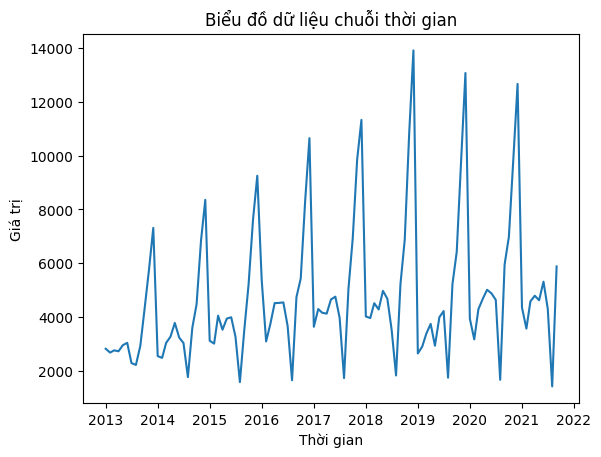

In [10]:
plt.plot(sales['Month'],sales['Sales'])
plt.title('Biểu đồ dữ liệu chuỗi thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Giá trị')
plt.show()

array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

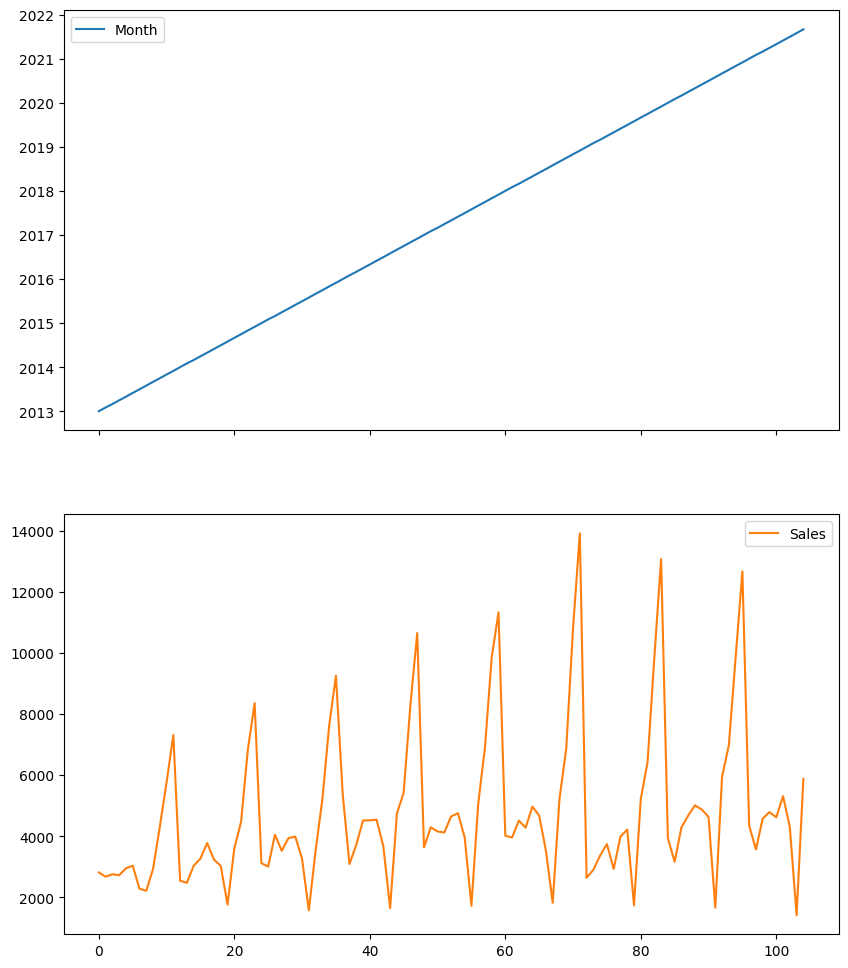

In [11]:
sales.plot(subplots=True, figsize=(10, 12))